In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array

In [ ]:
img_array=cv2.imread("Training/0/Training_3184672.jpg")

In [ ]:
img_array.shape

In [ ]:
plt.imshow(img_array)

In [2]:
Datadirectory="Training/"

In [3]:
Classes=["0","1","2","3","4","5","6"]


In [4]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')



In [5]:
imagesgen = ["Training_5420780.jpg","Training_5387344.jpg","Training_11050021.jpg","Training_13740441.jpg","Training_19204784.jpg","Training_25421729.jpg","Training_35175107.jpg","Training_41001987.jpg","Training_47680332.jpg","Training_62600200.jpg","Training_73540712.jpg"]


In [7]:
# create a folder named genPics1
try:
    directory = "genPic1"
    path_dir = os.path.join(Datadirectory,directory)
    os.mkdir(path_dir)
except Exception as e:
    print(e)

In [8]:
def imagesgenarator(img_list):
    for i in range(len(img_list)):
        pic = load_img(Datadirectory+"/1/"+img_list[i])
        pic_array = img_to_array(pic)
        pic_array = pic_array.reshape((1,) + pic_array.shape) # Converting into 4 dimension array
        # Generate 11 images
        # batch_size: At a time, how many image should be created.
        count = 0
        for batch in datagen.flow(pic_array, batch_size=5,save_to_dir=Datadirectory+"/genPic1", save_prefix=f'training{i}', save_format='jpeg'):
            count += 1
            if count > 95:
                break

In [9]:
imagesgenarator(imagesgen)

In [10]:
# Moved images from genPic1 to 1 folder
target_fol = r"Training\1" + "\\"
source_fol = r"Training\genPic1" + "\\"
def move_files(source_fol,target_fol):
    try:
        for path, dir, files in os.walk(source_fol):
            for file in files:
                if not os.path.isfile(target_fol + file):
                    os.rename(path + '\\'+ file,target_fol+file)
        print("All files are moved")
    except Exception as e:
        print(e)

In [11]:
move_files(source_fol,target_fol)


All files are moved


In [12]:

try:
    os.rmdir(source_fol)
except Exception as e:
    print(e)   

[WinError 145] The directory is not empty: 'Training\\genPic1\\'


In [15]:
for category in Classes:
    path= os.path.join(Datadirectory,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        
       # plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        #plt.show()
        break
    break

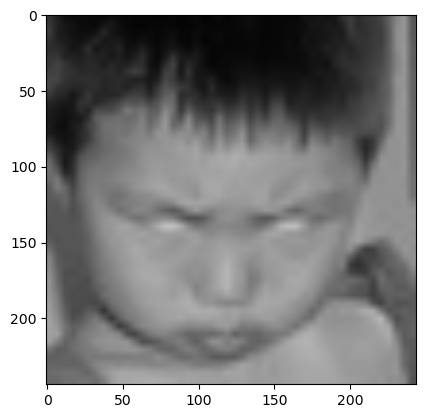

In [16]:
img_size=244
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
#plt.show()

In [17]:
new_array.shape

(244, 244, 3)

Read All the Images And Convert Them into Array


In [18]:
training_data=[]

def create_training_Data():
    for category in Classes:
        path= os.path.join(Datadirectory,category)
        class_num=Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array, (img_size,img_size))
                if new_array is not None:
                    training_data.append([new_array, class_num])
            except Exception as e:
                pass
        

In [19]:
create_training_Data()

In [20]:
print(len(training_data))


5959


In [21]:
import random 
random.shuffle(training_data)


In [22]:
X=[]
Y=[]
for features,label in training_data:
    X.append(features)
    Y.append(label)
    
X=np.array(X,dtype=np.float32).reshape(-1,img_size,img_size,3)

In [23]:
X.shape

(5959, 244, 244, 3)

In [24]:
X= X/255.0;

In [ ]:
type(Y)

In [25]:
Y=np.array(Y)

In [26]:
Y.shape

(5959,)

Model for Training - Transfer Learning

In [27]:
import tensorflow as tf


In [28]:
model = tf.keras.applications.MobileNetV2() #pre trained Model

In [29]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

 block_3_expand_relu (ReLU)  (None, 56, 56, 144)          0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 57, 57, 144)          0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, 28, 28, 144)          1296      ['block_3_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_3_depthwise_BN (Batc  (None, 28, 28, 144)          576       ['block_3_depthwise[0][0]']   
 hNormalization)                                                                                  
          

 block_6_depthwise_BN (Batc  (None, 14, 14, 192)          768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 14, 14, 192)          0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_project (Conv2D)    (None, 14, 14, 64)           12288     ['block_6_depthwise_relu[0][0]
                                                                    ']                            
                                                                                                  
 block_6_project_BN (BatchN  (None, 14, 14, 64)           256       ['block_6_project[0][0]']     
 ormalizat

                                                                                                  
 block_9_add (Add)           (None, 14, 14, 64)           0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 14, 14, 384)          24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_expand_BN (BatchN  (None, 14, 14, 384)          1536      ['block_10_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_10_expand_relu (ReLU  (None, 14, 14, 384)          0         ['block_10_expand_BN[0][0]']  
 )        

                                                                                                  
 block_13_expand_relu (ReLU  (None, 14, 14, 576)          0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 15, 15, 576)          0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
                                                                                                  
 block_13_depthwise (Depthw  (None, 7, 7, 576)            5184      ['block_13_pad[0][0]']        
 iseConv2D)                                                                                       
                                                                                                  
 block_13_

 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 7, 7, 960)            3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, 7, 7, 960)            0         ['block_16_depthwise_BN[0][0]'
 eLU)                                                               ]                             
                                                                                                  
 block_16_project (Conv2D)   (None, 7, 7, 320)            307200    ['block_16_depthwise_relu[0][0
                                                                    ]']                           
          

Transfer Learning -Tuning ,weights will start from last check point

In [30]:
base_input=model.layers[0].input

In [31]:
base_output=model.layers[-2].output

In [ ]:
base_output

In [32]:
final_output=layers.Dense(128)(base_output) ##adding new layer,after the output of global pooling layer
final_output=layers.Activation('relu')(final_output) ##activation function
final_output=layers.Dense(64)(final_output)
final_output =layers.Activation('relu')(final_output)
final_output=layers.Dense(7,activation='softmax')(final_output) #my classe are 07 ,classification layer

In [ ]:
final_output

In [33]:
new_model=keras.Model(inputs=base_input,outputs=final_output)

In [ ]:
new_model.summary()

In [ ]:
new_model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
new_model.fit(X,Y,epochs=15,batch_size=32)

In [2]:
new_model=tf.keras.models.load_model('face_emotion_rec.h5')

In [3]:
frame=cv2.imread("img_2.png")

In [4]:
frame.shape

(800, 800, 3)

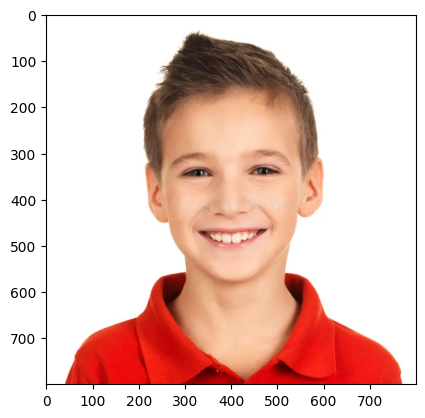

In [5]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

face detection Algorithm

In [6]:
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades +"haarcascade_frontalface_default.xml")


In [7]:
gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

In [8]:
gray.shape

(800, 800)

In [9]:
faces=faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray=gray[y:y+h, x:x+w]
    roi_color=frame[y:y+h, x:x+w]
    cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    face=faceCascade.detectMultiScale(roi_gray)
    if len(face)==0:
        print("face not detected")
        
    else:
        for(ex,ey,ew,eh) in face:
            face_roi=roi_color[ey:ey+eh , ex:ex+ew]
            

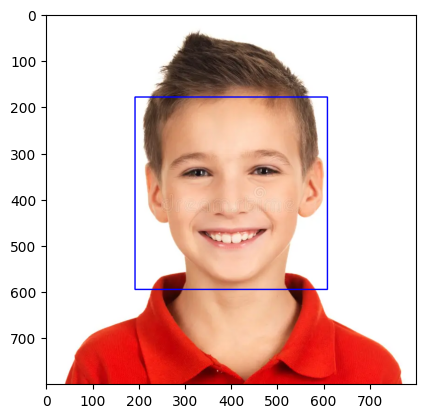

In [10]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

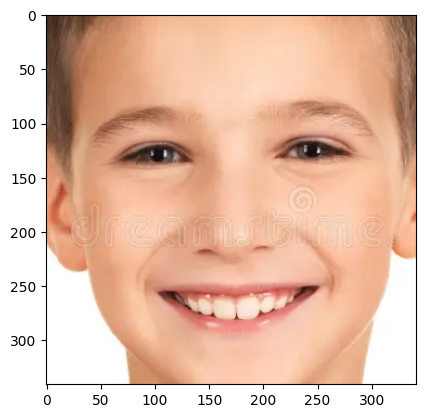

In [11]:
plt.imshow(cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB))

In [12]:
final_image=cv2.resize(face_roi,(224,224))
final_image=np.expand_dims(final_image,axis=0)
final_image=final_image/255.0

In [13]:
Predictions=new_model.predict(final_image)

1/1 [==============================] - 4s 4s/step


In [14]:
Predictions[0]

array([3.5272767e-03, 1.6350349e-06, 1.6551085e-04, 9.7879469e-01,
       1.4488311e-03, 5.9686674e-05, 1.6002333e-02], dtype=float32)

In [15]:
np.argmax(Predictions)

3

In [22]:
import cv2
path="haarcascade_frontalface_default.xml"
font_scale=1.5
font=cv2.FONT_HERSHEY_PLAIN

rectangle_bgr=(255,255,255)
img=np.zeros((500,500))
text="Satvik Chauhan"
(text_width,text_height)=cv2.getTextSize(text,font,fontScale=font_scale,thickness=1)[0]
text_offset_x=10
text_offset_y=img.shape[0]-25
box_chords=((text_offset_x,text_offset_y),(text_offset_x+text_width+2,text_offset_y-text_height-2))
cv2.rectangle(img,box_chords[0],box_chords[1],rectangle_bgr,cv2.FILLED)
cv2.putText(img,text,(text_offset_x,text_offset_y),font,fontScale=font_scale,color=(0,0,0),thickness=1)


cap=cv2.VideoCapture()
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
while True:
    ret,frame=cap.read()
    
    faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades +"haarcascade_frontalface_default.xml")
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces=faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray=gray[y:y+h, x:x+w]
        roi_color=frame[y:y+h, x:x+w]
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        face=faceCascade.detectMultiScale(roi_gray)
        if len(face)==0:
            print("face not detected")
        
        else:
            for(ex,ey,ew,eh) in face:
                face_roi=roi_color[ey:ey+eh , ex:ex+ew]
    final_image=cv2.resize(face_roi,(224,224))
    final_image=np.expand_dims(final_image,axis=0)
    final_image=final_image/255.0
    
    font=cv2.FONT_HERSHEY_SIMPLEX
    
    Predictions=new_model.predict(final_image)
    font_scale=1.5
    
    font=cv2.FONT_HERSHEY_PLAIN
    
    if(np.argmax(Predictions)==0):
        status="Angry"
        x1,y1,w1,h1=0,0,175,75
        
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))

    if(np.argmax(Predictions)==1):
        status="Disgust"
        x1,y1,w1,h1=0,0,175,75
        
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))

    if(np.argmax(Predictions)==2):
        status="Fear"
        x1,y1,w1,h1=0,0,175,75
        
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
        
    if(np.argmax(Predictions)==3):
        status="Happy"
        x1,y1,w1,h1=0,0,175,75
        
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
        
        
    if(np.argmax(Predictions)==4):
        status="Neutral"
        x1,y1,w1,h1=0,0,175,75
        
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
        
        
    if(np.argmax(Predictions)==5):
        status="Sad"
        x1,y1,w1,h1=0,0,175,75
        
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))        

        
    
      
    if(np.argmax(Predictions)==6):
        status="Surprise"
        x1,y1,w1,h1=0,0,175,75
        
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
        
        
    cv2.imshow("Face Emotion recog",frame)
    if cv2.waitKey(2)& 0xFF == ord('q'):
        break
        

cap.release()
cv2.destroyAllWindows()
    
    

1/1 [==============================] - 0s 52ms/step
face not detected
1/1 [==============================] - 0s 47ms/step
face not detected
1/1 [==============================] - 0s 47ms/step
face not detected
1/1 [==============================] - 0s 48ms/step
face not detected
1/1 [==============================] - 0s 47ms/step
face not detected
1/1 [==============================] - 0s 47ms/step
face not detected
1/1 [==============================] - 0s 31ms/step
face not detected
1/1 [==============================] - 0s 42ms/step
face not detected
1/1 [==============================] - 0s 39ms/step
